## Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data processing, 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

## Dataset

The data set used in this analysis was downloaded from kaggle.<br/>
It contains the following datasets (in .csv format):

* 2014_Financial_Data.csv
* 2015_Financial_Data.csv
* 2016_Financial_Data.csv
* 2017_Financial_Data.csv
* 2018_Financial_Data.csv

Each dataset contains 200+ financial indicators for all the stocks of the US stock market. The financial indicators have been scraped from Financial Modeling Prep API, and are those found in the 10-K filings that publicly traded companies release yearly.

The last column of the dataset represent the class of each stock, where:

* if the value of a stock increases during 2019, then class=1;
* if the value of a stock decreases during 2019, then class=0.

In other words, stocks that belong to class 1 are stocks that one should buy at the start of year 2019, and sell at the end of year 2019.

## Load the Dataset

In [2]:
df_2014 = pd.read_csv('2014_Financial_Data.csv')
df_2015 = pd.read_csv('2015_Financial_Data.csv')
df_2016 = pd.read_csv('2016_Financial_Data.csv')
df_2017 = pd.read_csv('2017_Financial_Data.csv')
df_2018 = pd.read_csv('2018_Financial_Data.csv')

## Perform Exploratory Data Analysis

In [8]:
df_2014.head() # display first 5 rows of dataset

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [10]:
df_2014.dtypes # displays the data types for each column

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2015 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

In [11]:
df_2014.columns # lists all the columns/features in the data set

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

In [4]:
# Checking the Shape of data set across the years

print("Shape of data for Year 2014 is {}".format(df_2014.shape))
print("Shape of data for Year 2015 is {}".format(df_2015.shape))
print("Shape of data for Year 2016 is {}".format(df_2016.shape))
print("Shape of data for Year 2017 is {}".format(df_2017.shape))
print("Shape of data for Year 2018 is {}".format(df_2018.shape))

Shape of data for Year 2014 is (3808, 225)
Shape of data for Year 2015 is (4120, 225)
Shape of data for Year 2016 is (4797, 225)
Shape of data for Year 2017 is (4960, 225)
Shape of data for Year 2018 is (4392, 225)


In [16]:
df_2014.describe() # descriptive statistics for year 2014

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3208.000000,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3.808000e+03,3808.000000
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,0.036206,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,0.259765,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,0.000000,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.000000,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.044000,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,1.331484e+01,1.000000
max,1.824698e+12,42138.663900,1.537249e+12,4.621600e+11,1.153700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,3.605800,9328.200000,76.625000,5468.426400,1360.125000,729.576600,1542.611000,225.690000,2.418601e+06,1.000000


In [17]:
df_2015.describe() # descriptive statistics for year 2015

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
count,4.053000e+03,3780.000000,3.927000e+03,4.055000e+03,3.855000e+03,3.950000e+03,3.946000e+03,4.078000e+03,3.945000e+03,4.017000e+03,...,3445.000000,3752.000000,3751.000000,3751.000000,3662.000000,3721.000000,3769.000000,3773.000000,4120.000000,4120.000000
mean,5.005532e+09,0.289257,3.194520e+09,1.884870e+09,9.605866e+07,8.390737e+08,1.358340e+09,5.072675e+08,9.448146e+07,4.072179e+08,...,0.012775,0.524476,0.143941,0.428794,1.982999,2.834435,0.294680,0.313609,103.077642,0.701699
std,3.455765e+10,3.579223,2.837197e+10,8.398565e+09,6.755995e+08,3.487307e+09,5.194782e+09,2.774280e+09,5.302102e+08,2.427021e+09,...,0.276812,6.678239,3.115030,4.205201,116.556190,91.533758,5.666982,5.798361,3756.530836,0.457568
min,-3.357020e+08,-1.064300,-2.665346e+09,-1.280800e+10,-4.179153e+06,0.000000e+00,-5.495512e+09,-1.933900e+10,-1.710954e+09,-1.910900e+10,...,-1.000000,-1.000000,-1.000000,-0.996400,-379.478300,-1.000000,-1.000000,-0.991200,-99.947830,0.000000
25%,5.867900e+07,-0.051950,2.840826e+06,2.792500e+07,0.000000e+00,1.713775e+07,3.410525e+07,-5.739400e+06,0.000000e+00,-1.058800e+07,...,0.000000,-0.108450,-0.011400,-0.052500,-0.131850,-0.064400,0.000000,-0.033100,-5.172844,0.000000
50%,4.083450e+08,0.031850,1.448460e+08,1.783760e+08,0.000000e+00,7.564400e+07,1.474340e+08,3.108000e+07,2.844000e+06,1.952500e+07,...,0.000000,0.000000,0.000000,0.034500,0.010250,0.000000,0.000000,0.052400,17.278935,1.000000
75%,2.219136e+09,0.160325,1.153572e+09,8.336660e+08,1.121000e+07,3.540000e+08,6.214052e+08,2.336181e+08,4.460000e+07,1.721000e+08,...,0.034900,0.143350,0.022250,0.169700,0.111325,0.164900,0.000000,0.188300,40.567983,1.000000
max,1.886894e+12,189.817900,1.581527e+12,3.053670e+11,1.306700e+10,9.341800e+10,9.341800e+10,7.123000e+10,1.844600e+10,7.251500e+10,...,3.941000,220.341000,170.427600,153.720000,7039.325900,5443.000000,297.736800,324.926800,212700.011623,1.000000


In [18]:
df_2016.describe() # descriptive statistics for year 2016

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,...,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4.797000e+03,4797.000000
mean,4.802586e+09,1.520193,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,...,0.005076,0.812488,0.185010,0.583518,0.759701,2.593773,0.149195,0.252307,3.650260e+02,0.670836
std,3.261058e+10,52.397806,2.705305e+10,7.913180e+09,7.347024e+08,3.465465e+09,4.930970e+09,2.548440e+09,4.355067e+08,2.190013e+09,...,0.282685,21.477336,3.848082,14.082608,91.443780,54.310889,3.591208,3.349447,1.940149e+04,0.469959
min,-3.819270e+08,-12.769300,-2.639031e+09,-3.564190e+09,-8.610000e+07,-5.207792e+07,-9.357000e+08,-6.770000e+09,-1.107000e+09,-7.621000e+09,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.000000,-2.662200,-2.099000,-9.999941e+01,0.000000
25%,5.212225e+07,-0.047275,2.699000e+06,2.659882e+07,0.000000e+00,1.696775e+07,3.431300e+07,-5.629444e+06,0.000000e+00,-9.890840e+06,...,0.000000,-0.049300,0.000000,-0.040700,-0.122950,-0.080100,0.000000,-0.027700,-6.730768e+00,0.000000
50%,4.059750e+08,0.032300,1.422140e+08,1.764620e+08,0.000000e+00,7.584050e+07,1.509050e+08,3.043300e+07,3.275789e+06,1.993900e+07,...,0.000000,0.006000,0.000000,0.040100,0.025650,0.000000,0.000000,0.048700,1.090686e+01,1.000000
75%,2.056847e+09,0.160525,1.106300e+09,8.003870e+08,1.237750e+07,3.505530e+08,5.941360e+08,2.242548e+08,4.717500e+07,1.655055e+08,...,0.040050,0.199100,0.028500,0.146700,0.122550,0.124900,0.000000,0.179200,3.155634e+01,1.000000
max,1.822805e+12,3234.456800,1.548384e+12,2.744210e+11,1.608500e+10,9.704100e+10,9.704100e+10,6.002400e+10,1.517600e+10,6.137200e+10,...,5.400500,1340.695700,217.041700,636.156900,3710.666700,2893.736800,224.818200,122.895700,1.321281e+06,1.000000


In [19]:
df_2017.describe() # descriptive statistics for year 2017

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2018 PRICE VAR [%],Class
count,4.435000e+03,4236.000000,4.281000e+03,4.426000e+03,4.173000e+03,4.299000e+03,4.299000e+03,4.456000e+03,4.283000e+03,4.381000e+03,...,3877.000000,4257.000000,4149.00000,4168.000000,4067.00000,4106.000000,4110.000000,4132.000000,4960.000000,4960.000000
mean,5.085608e+09,0.953124,3.235881e+09,1.934378e+09,1.061590e+08,8.532075e+08,1.331302e+09,5.943889e+08,9.961462e+07,4.974142e+08,...,0.005444,9.660352,0.11746,1.084989,0.22719,1.457853,0.383984,0.719938,-4.461547,0.276210
std,3.148389e+10,18.956861,2.619288e+10,7.911822e+09,7.983065e+08,3.521939e+09,5.214527e+09,2.763764e+09,4.185841e+08,2.362747e+09,...,0.256422,370.977527,1.07944,32.740851,4.59341,33.852958,13.378255,31.830424,561.802215,0.447167
min,-3.004500e+07,-6.872700,-2.986888e+09,-8.138230e+08,-1.098000e+08,-1.043667e+08,-1.088000e+09,-1.868300e+10,-1.932443e+08,-1.819800e+10,...,-1.000000,-1.000000,-1.00000,-1.000000,-221.00000,-1.000000,-1.218100,-2.369900,-99.999115,0.000000
25%,5.900000e+07,0.000000,3.945000e+06,3.200000e+07,0.000000e+00,1.861650e+07,3.700850e+07,-4.376053e+06,0.000000e+00,-9.396000e+06,...,0.000000,-0.003000,0.00000,-0.008050,-0.06225,-0.059250,0.000000,-0.003925,-33.388915,0.000000
50%,4.400000e+08,0.073050,1.588160e+08,1.993761e+08,0.000000e+00,8.360500e+07,1.638000e+08,3.739450e+07,4.800000e+06,2.464000e+07,...,0.000000,0.054600,0.00000,0.066300,0.06060,0.000000,0.000000,0.067250,-13.336397,0.000000
75%,2.254111e+09,0.211625,1.170103e+09,8.823762e+08,1.400000e+07,3.711330e+08,6.229360e+08,2.604446e+08,5.300000e+07,1.976460e+08,...,0.037100,0.249200,0.09070,0.203425,0.19230,0.152600,0.001175,0.182500,2.124593,1.000000
max,1.695864e+12,825.959800,1.465577e+12,2.302870e+11,2.262000e+10,1.018530e+11,1.018530e+11,6.513565e+10,1.340100e+10,6.408900e+10,...,3.561000,18499.000000,43.55340,2014.273300,84.12770,1981.061600,837.000000,2042.000000,39219.999109,1.000000


In [20]:
df_2018.describe() # descriptive statistics for year 2018

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


## Data Cleaning

In [30]:
# Checking for missing data for 2014

df_2014.isnull().sum()

Unnamed: 0              0
Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
Sector                  0
2015 PRICE VAR [%]      0
Class                   0
Length: 225, dtype: int64

In [15]:
# Checking for missing data for 2015

df_2015.isnull().sum()

Unnamed: 0                0
Revenue                  67
Revenue Growth          340
Cost of Revenue         193
Gross Profit             65
                       ... 
R&D Expense Growth      351
SG&A Expenses Growth    347
Sector                    0
2016 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [21]:
# Checking for missing data for 2016

df_2016.isnull().sum()

Unnamed: 0                0
Revenue                 489
Revenue Growth          649
Cost of Revenue         640
Gross Profit            492
                       ... 
R&D Expense Growth      772
SG&A Expenses Growth    756
Sector                    0
2017 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [22]:
# Checking for missing data for 2017

df_2017.isnull().sum()

Unnamed: 0                0
Revenue                 525
Revenue Growth          724
Cost of Revenue         679
Gross Profit            534
                       ... 
R&D Expense Growth      850
SG&A Expenses Growth    828
Sector                    0
2018 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

In [23]:
# Checking for missing data for 2018

df_2018.isnull().sum()

Unnamed: 0                0
Revenue                  46
Revenue Growth          139
Cost of Revenue         185
Gross Profit             64
                       ... 
R&D Expense Growth      259
SG&A Expenses Growth    248
Sector                    0
2019 PRICE VAR [%]        0
Class                     0
Length: 225, dtype: int64

### Missing Value Imputation :

We will replace the null values with 0 because in the case of this dataset missing values refect companies don't have a value for that year.

In [25]:
df_2014.fillna(0,inplace=True)
df_2015.fillna(0,inplace=True)
df_2016.fillna(0,inplace=True)
df_2017.fillna(0,inplace=True)
df_2018.fillna(0,inplace=True)

### Checking for duplicates

In [29]:
print("Total duplicates for Year 2014 is {}".format(df_2014.duplicated().sum()))
print("Total duplicates for Year 2015 is {}".format(df_2015.duplicated().sum()))
print("Total duplicates for Year 2016 is {}".format(df_2016.duplicated().sum()))
print("Total duplicates for Year 2017 is {}".format(df_2017.duplicated().sum()))
print("Total duplicates for Year 2018 is {}".format(df_2018.duplicated().sum()))

Total duplicates for Year 2014 is 0
Total duplicates for Year 2015 is 0
Total duplicates for Year 2016 is 0
Total duplicates for Year 2017 is 0
Total duplicates for Year 2018 is 0


## Financial Analysis: Procter & Gamble

In [31]:
# Filter Procter & Gamble company

df_2014 = df_2014[df_2014['Unnamed: 0'] =='PG' ]
df_2015 = df_2015[df_2015['Unnamed: 0'] =='PG' ]
df_2016 = df_2016[df_2016['Unnamed: 0'] =='PG' ]
df_2017 = df_2017[df_2017['Unnamed: 0'] =='PG' ]
df_2018 = df_2018[df_2018['Unnamed: 0'] =='PG' ]

In [32]:
df_2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0


In [35]:
## Create a new dataframe for Procter & Gamble across the years

df = df_2014.append([df_2015,df_2016,df_2017,df_2018])
df.head() 

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,NaN,NaN,NaN,NaN
0,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.1432,0.0,-0.0394,Consumer Defensive,NaN,1,10.809451,NaN,NaN,NaN
0,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,0.0083,0.0,-0.0809,Consumer Defensive,NaN,1,NaN,12.532463,NaN,NaN
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,0.0325,0.0,-0.0156,Consumer Defensive,NaN,1,NaN,NaN,4.975151,NaN
26,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,-0.0097,0.0,0.0205,Consumer Defensive,NaN,1,NaN,NaN,NaN,40.680273


In [38]:
df.isnull().sum() # checking missing values

Unnamed: 0            0
Revenue               0
Revenue Growth        0
Cost of Revenue       0
Gross Profit          0
                     ..
Class                 0
2016 PRICE VAR [%]    4
2017 PRICE VAR [%]    4
2018 PRICE VAR [%]    4
2019 PRICE VAR [%]    4
Length: 229, dtype: int64

In [40]:
df.fillna(0,inplace=True) # filling missing values with zeros
df.isnull().sum()

Unnamed: 0            0
Revenue               0
Revenue Growth        0
Cost of Revenue       0
Gross Profit          0
                     ..
Class                 0
2016 PRICE VAR [%]    0
2017 PRICE VAR [%]    0
2018 PRICE VAR [%]    0
2019 PRICE VAR [%]    0
Length: 229, dtype: int64

In [44]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
count,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.0,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,6.846780e+10,-0.034760,3.521300e+10,3.325480e+10,0.0,1.974340e+10,2.014900e+10,1.310580e+10,5.770000e+08,1.394180e+10,...,-0.033380,0.002140,0.0,-0.058000,-1.864655,0.800000,2.161890,2.506493,0.995030,8.136055
std,4.023388e+09,0.045114,2.762026e+09,1.308222e+09,0.0,1.227645e+09,1.792898e+09,1.171702e+09,9.671349e+07,3.086190e+09,...,0.052193,0.095894,0.0,0.074876,4.169496,0.447214,4.834134,5.604688,2.224955,18.192771
min,6.505800e+10,-0.077000,3.263800e+10,3.239000e+10,0.0,1.865400e+10,1.865400e+10,1.104900e+10,4.650000e+08,9.761000e+09,...,-0.101300,-0.143200,0.0,-0.174600,-9.323276,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.529900e+10,-0.071300,3.290900e+10,3.240000e+10,0.0,1.894900e+10,1.894900e+10,1.336300e+10,5.060000e+08,1.321500e+10,...,-0.062700,-0.009700,0.0,-0.080900,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.683200e+10,-0.049100,3.443200e+10,3.242000e+10,0.0,1.903700e+10,1.903700e+10,1.344100e+10,5.790000e+08,1.385000e+10,...,-0.035700,0.008300,0.0,-0.039400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.074900e+10,-0.003700,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.146100e+10,1.376600e+10,6.260000e+08,1.449400e+10,...,0.001200,0.032500,0.0,-0.015600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.440100e+10,0.027300,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.264400e+10,1.391000e+10,7.090000e+08,1.838900e+10,...,0.031600,0.122800,0.0,0.020500,0.000000,1.000000,10.809451,12.532463,4.975151,40.680273


In [42]:
df_index = [2014,2015,2016,2017,2018]
df_index

[2014, 2015, 2016, 2017, 2018]

### Ratio Analysis

In order to quickly grasp a company's financial status, a financial ratio might be used. More than 59 financial ratios exist, but the Quick Ratio is the strongest indicator of a company's liquidity. Thus, the Quick Ratio is measures a company's ability to pay its debts, therefore we'll focus on it here. 

#### Formula
Quick Ratio : current assest - inventory /current liabilities

In [47]:
# Filter data set by Quick Ratio across the years

df.quickRatio

2014    0.506197
2015    0.542833
2016    0.575918
2017    0.653128
2018    0.585615
Name: quickRatio, dtype: float64

In [49]:
### Calculate the mean of Quick Ratio (MQR) for the past 5-years starting 2014

df['quickRatio'].mean()

0.5727381978561461

### Visualize Quick Ratio Analysis

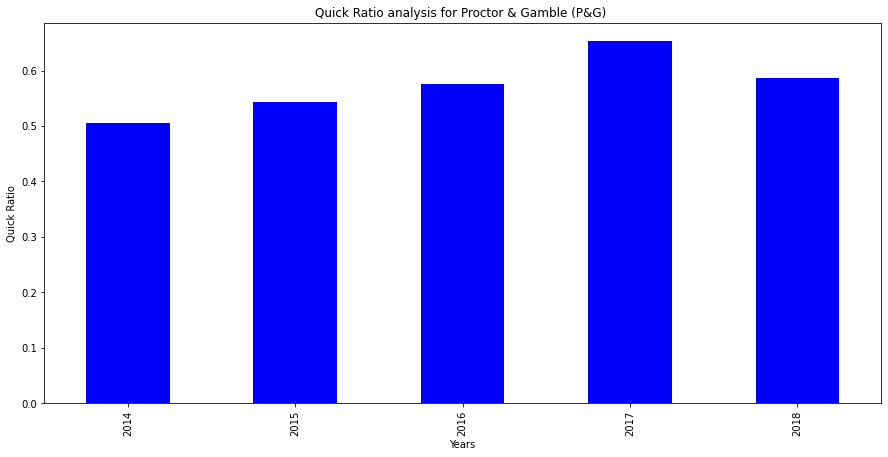

In [51]:
plt.figure(figsize=(15, 7))
df['quickRatio'].plot.bar(color='b')
plt.xlabel('Years')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio analysis for Proctor & Gamble (P&G) ')
plt.grid(False)
plt.show()

#### What Is a Good Quick Ratio? [Oracle/NetSuite](https://www.netsuite.com/portal/resource/articles/financial-management/quick-ratio.shtml#:~:text=The%20quick%20ratio%20represents%20the,be%20readily%20converted%20to%20cash.)

A quick ratio that is equal to or greater than 1 means the company has enough liquid assets to meet its short-term obligations.

However, an extremely high quick ratio isn’t necessarily a good sign, since it may indicate the company is sitting on a significant amount of capital that could be better invested to expand the business.

#### What Does a Quick Ratio Under 1 Mean?

If a business’s quick ratio is less than 1, it means it doesn’t have enough quick assets to meet all its short-term obligations. If it suffers an interruption, it may find it difficult to raise the cash to pay its creditors.

Refer to [Oracle/NetSuite](https://www.netsuite.com/portal/resource/articles/financial-management/quick-ratio.shtml#:~:text=The%20quick%20ratio%20represents%20the,be%20readily%20converted%20to%20cash.)
for more information on quick ratio.

### Observation:
* P&G has a mean Quick ratio of 0.57 
* This implies that the company can not fulfill it's short term obligations. Thus, if it suffers an interruption, it may find it difficult to raise the cash to pay its creditors.

#### Quick Ratio vs Current Ratio [Oracle/NetSuite](https://www.netsuite.com/portal/resource/articles/financial-management/quick-ratio.shtml#:~:text=The%20quick%20ratio%20represents%20the,be%20readily%20converted%20to%20cash.)

The quick ratio is one way to measure business liquidity. Another common method is the current ratio. Whereas the quick ratio only includes a company’s most highly liquid assets, like cash, the current ratio factors in all of a company’s current assets — including those that may not be as easy to convert into cash, such as inventory. Both ratios compare assets against the business’s current liabilities.

Current liabilities are defined as all expenses a business is due to pay within one year. The category can include short-term debts, accounts payable and accrued expenses, which are debits that the company has recognized on the balance sheet but hasn’t yet paid.

Therefore, before reaching a conclusion about short term obligation, we need analyze to current ratio as well.

## Current ratio


* #### Current Ratio : (Current Assest + Inventory) / Current Liabilites
* #### Good Current ratio is between 1 and 2 , if current ratio more than 2 it means the company is unable to make use of it's inventory.

In [52]:
df['currentRatio'] # display current ratio across the years

2014    0.937
2015    0.995
2016    1.098
2017    0.877
2018    0.826
Name: currentRatio, dtype: float64

In [53]:
df['currentRatio'].mean() #calculate the mean current ratio across the years

0.9465999999999999

### Visualize Current Ratio

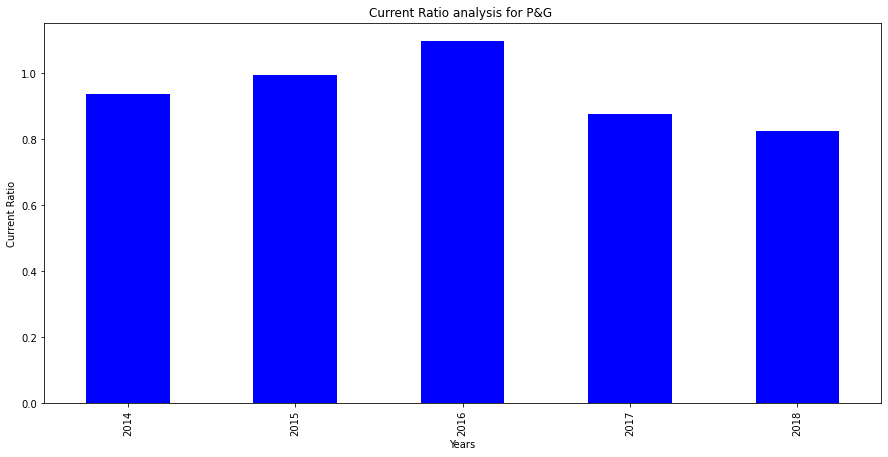

In [57]:
plt.figure(figsize=(15, 7))
df['currentRatio'].plot.bar(color='b')
plt.xlabel('Years')
plt.ylabel('Current Ratio')
plt.title('Current Ratio analysis for P&G ')
plt.grid(False)
plt.show()

### Observation:

* P&G has good Current ratio (0.95) but still company has more current liabilites compare to current assests.

### To further understand the financial status of P&G, we will further analyze it's Debt to Equity Ratio.

* The debt-to-equity (D/E) ratio is calculated by dividing a company’s total liabilities by its shareholder equity
* It reflects the ability of shareholder equity to cover all outstanding debts in the event of a business downturn.
* **Debt/Equity= Total Liabilities/Shareholder Equity**
* **Total Asset = Liabilities + Shareholder equity**

## Debt to Equity ratio

In [58]:
df['debtEquityRatio'] # displays D/E across the years

2014    0.5061
2015    0.4813
2016    0.5277
2017    0.5664
2018    0.5916
Name: debtEquityRatio, dtype: float64

In [59]:
df['debtEquityRatio'].mean() # mean D/E

0.5346200000000001

### Visualize D/E across the years

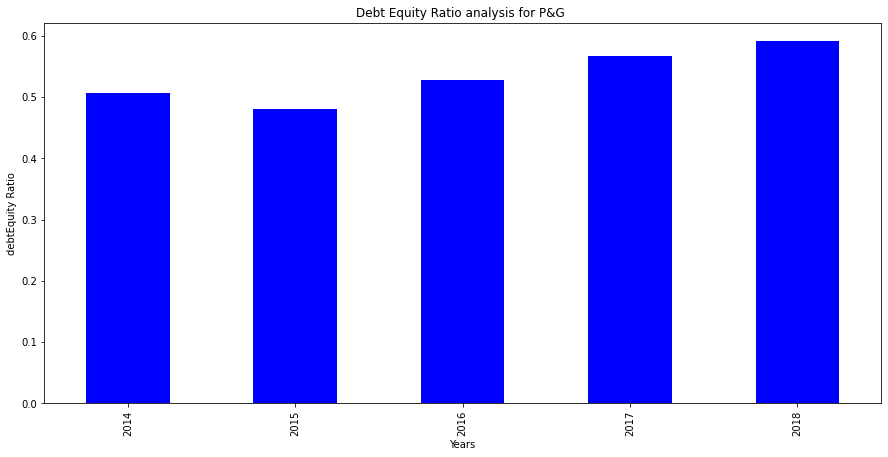

In [62]:
plt.figure(figsize=(15, 7))
df['debtEquityRatio'].plot.bar(color='b')
plt.xlabel('Years')
plt.ylabel('debtEquity Ratio')
plt.title('Debt Equity Ratio analysis for P&G ')
plt.grid(False)
plt.show()

### Observation:

* For investors it is a good sign : Many investors look for a company to have a debt ratio between 0.3 and 0.6.

## Inventory Trunover


The Inventory turnover is a measure of the number of times inventory is sold or used in a time period such as a year. It is calculated to see if a business has an excessive inventory in comparison to its sales level.

* **Inventory Turnover = Sales/Average Inventory**
* **Average Inventory = (Start Inventory - ending Inventory)/2**

In [66]:
df['inventoryTurnover'] # display Inventory Turnover for each year

2014    10.8869
2015    12.0547
2016    13.4707
2017    13.9310
2018    14.2773
Name: inventoryTurnover, dtype: float64

In [67]:
df['inventoryTurnover'].mean() # displays Inventory Turnover across the years

12.924119999999998

## Visualize Inventory Turnover for P&G

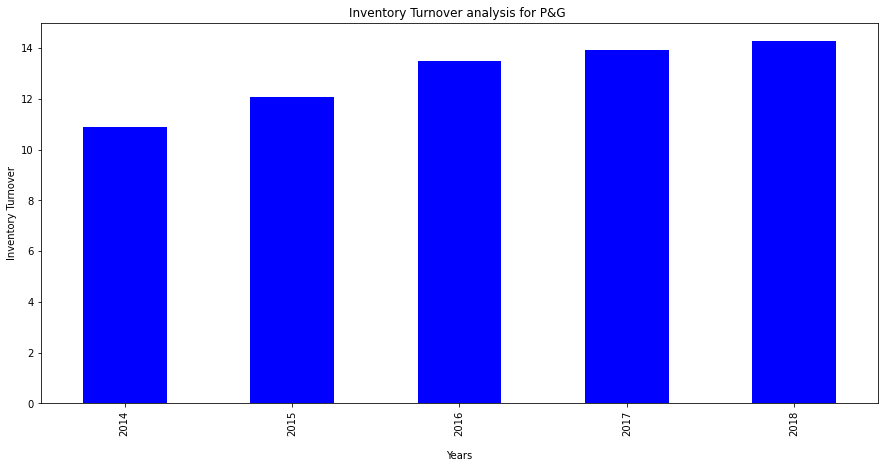

In [71]:
plt.figure(figsize=(15, 7))
df['inventoryTurnover'].plot.bar(color='b')
plt.xlabel('Years', labelpad=15)
plt.ylabel('Inventory Turnover')
plt.title('Inventory Turnover analysis for P&G ')
plt.grid(False)
plt.show()

### Conclusion:
* P&G incurred an average revenue of 6.846780e+10 (billion) from 2014-2015.
* P&G saw a decine in revenue growth (-0.034760) from 2014-2015.
* P&G has a mean Quick ratio of 0.57, which implies that the company can not fulfill it's short term obligations. 
* However, the company has a good Current ratio (0.95) even though it has more current liabilites compared to current assests.
* Also, it has a good Debt to Equity Ratio (0.53), which is a good sign for potential investors.

## References

1. Beaver, S. (n.d.). Quick Ratio: How to Calculate &amp; Examples. Oracle NetSuite. Retrieved June 6, 2022, from https://www.netsuite.com/portal/resource/articles/financial-management/quick-ratio.shtml#:~:text=The%20quick%20ratio%20represents%20the,be%20readily%20converted%20to%20cash. 
2. Prayankkul. (2020, February 3). Complete Financial Analysis. Kaggle. Retrieved June 8, 2022, from https://www.kaggle.com/code/prayankkul/complete-financial-analysis 
3. Carbone, N. (2020, January 18). 200+ financial indicators of US stocks (2014-2018). Kaggle. Retrieved June 8, 2022, from https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv 